In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Morphological operations

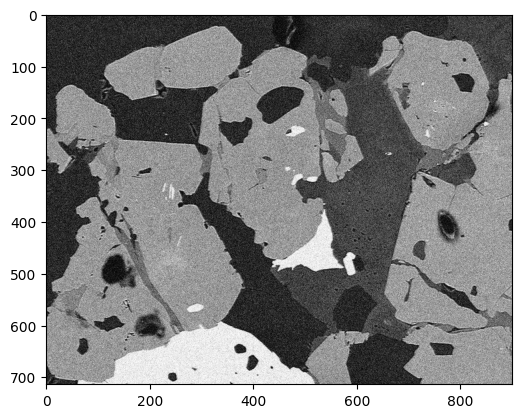

In [7]:
img = cv2.imread("images/BSE_Google_noisy.jpg", 0)
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

### This is an image of a rock with noise

<function matplotlib.pyplot.show(close=None, block=None)>

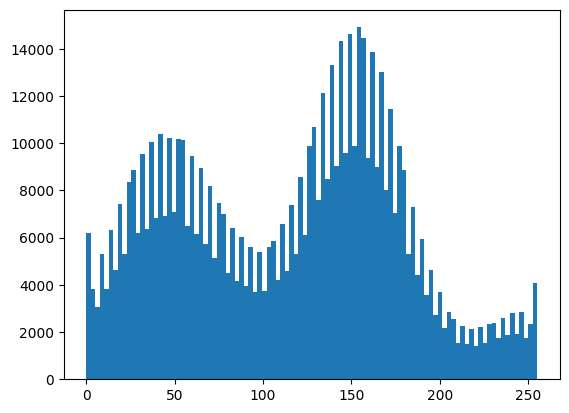

In [9]:
plt.hist(img.flat,bins=100, range=(0,255))
plt.show

### Now if i segment using OTSU (so automatically without chosing the threshold) i presume the th is around 100

In [10]:
# OTSU is used for binary
ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #255 is the value i assign to the found pixels

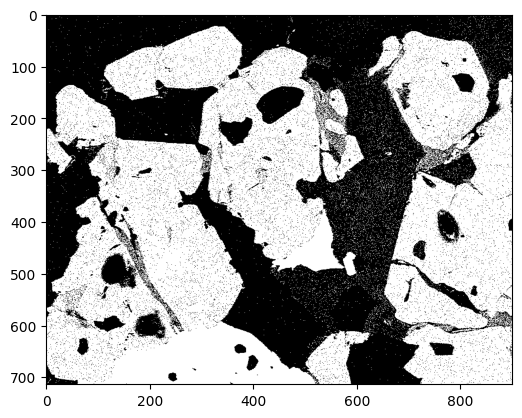

In [18]:
## the white pixel (255) are the ones over the threshold
plt.imshow(th,cmap=plt.cm.gray)
plt.show()

In [16]:
print("the th found is ",ret)

the th found is  107.0


## As expected

Yet, there are white spikes in the dark areas, we need to clean them!

I perform erosion and dilusion

- Erosion is basically removing certain pixels
- Dilution is basically adding pixels

How many pixels? dipending on the kernels

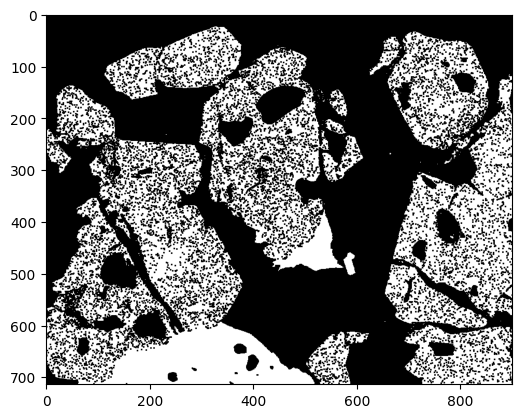

In [21]:
kernel = np.ones((3,3),np.uint8)   # 3x3 kernel with all ones. 
erosion = cv2.erode(th,kernel,iterations = 1)  #Erodes pixels based on the kernel defined
plt.imshow(erosion,cmap=plt.cm.gray)
plt.show()

- It did an excellent work for the background, all the isoleted pixels are cleaned up
- But it removed also isolated pixels in the white areas due to some peakes there.

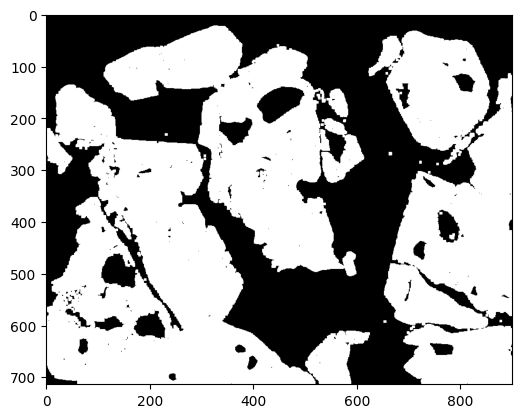

In [22]:
dilation = cv2.dilate(erosion,kernel,iterations = 2)  #Apply dilation after erosion to see the effect. 
plt.imshow(dilation,cmap=plt.cm.gray)
plt.show()

Is possible to achieve the same results  of 1 erosion and 1 dilation without 2 separates commands

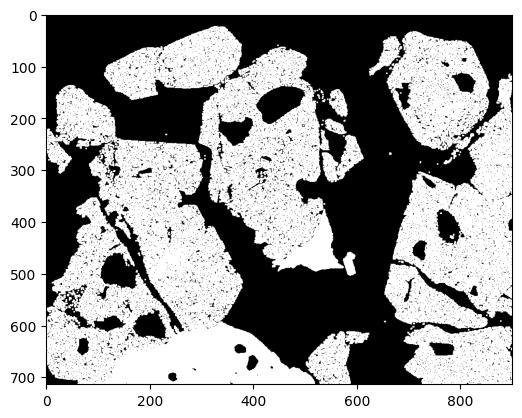

In [23]:
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)  # Compare this image with the previous one
plt.imshow(opening,cmap=plt.cm.gray)
plt.show()

In [24]:
erosion = cv2.erode(th,kernel,iterations = 1)  #Erodes pixels based on the kernel defined

dilation = cv2.dilate(erosion,kernel,iterations = 1)  

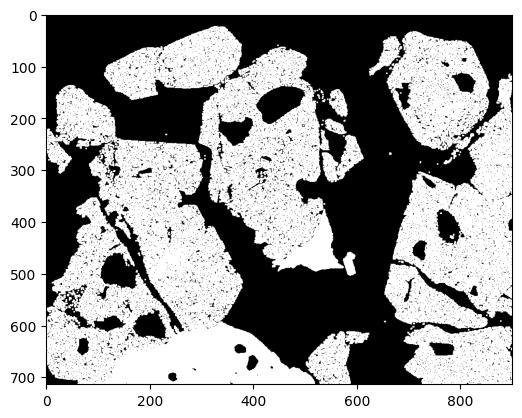

In [25]:
plt.imshow(dilation,cmap=plt.cm.gray)
plt.show()

They are clearly the same

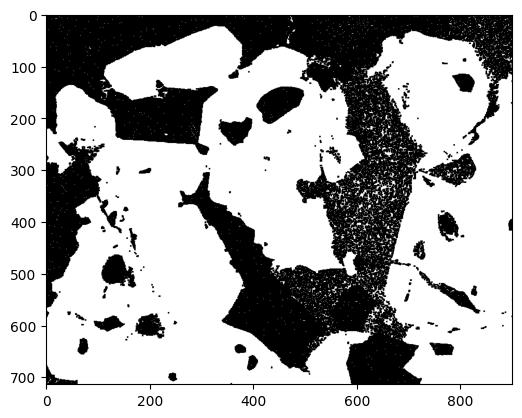

In [27]:
#Closing is opposit, dilation followed by erosion.
closing = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap=plt.cm.gray)
plt.show()

## Overview

When morphological operations are needed?
given an image:
- first try to denoise(eg median filter...)
- then try to segment (using for example OTSU)
- Really better results than using opening and closing!

if is not possible to improve, then try the morphological operations!

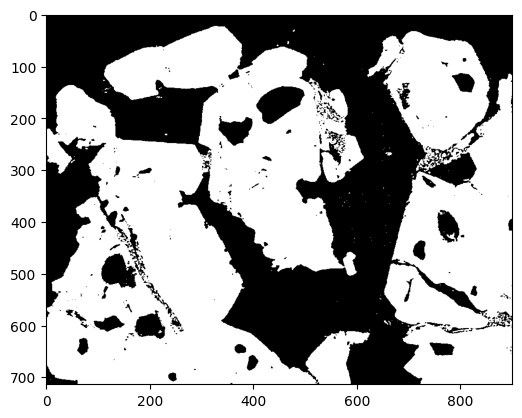

In [30]:
### let's prove this!
median = cv2.medianBlur(img,3)
ret,th = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #255 is the value i assign to the found pixels
plt.imshow(th,cmap=plt.cm.gray)
plt.show()

This is clearly better than the images obtained (even the one with 2 iterations)